Joining with `by = join_by(word)`


[[1]]
[1] "arules"    "Matrix"    "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE      30    0.02      2
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[24 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [24 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


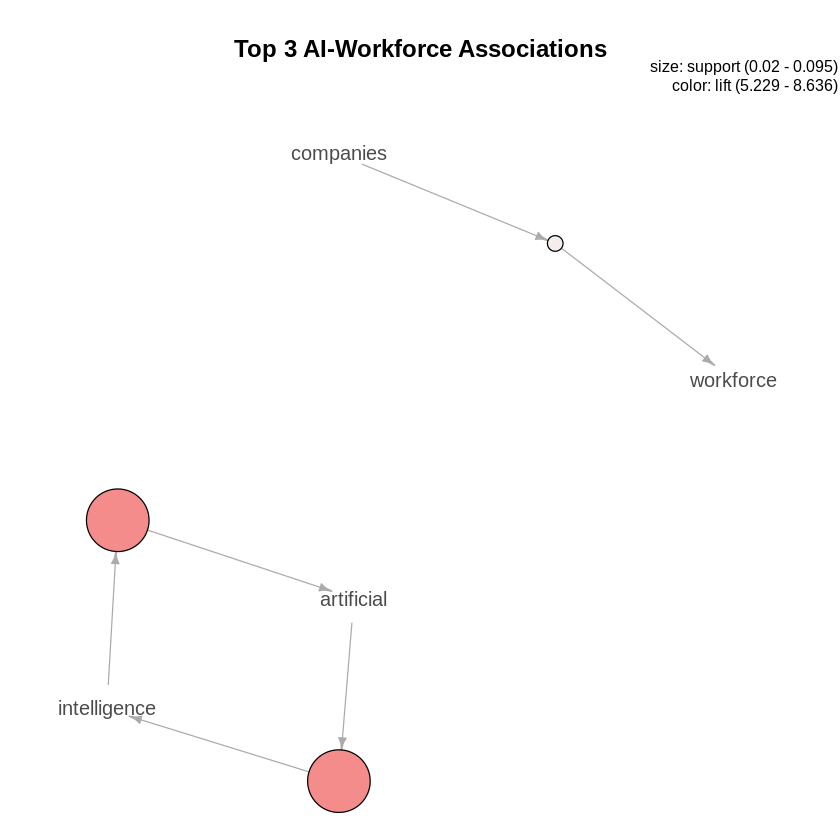

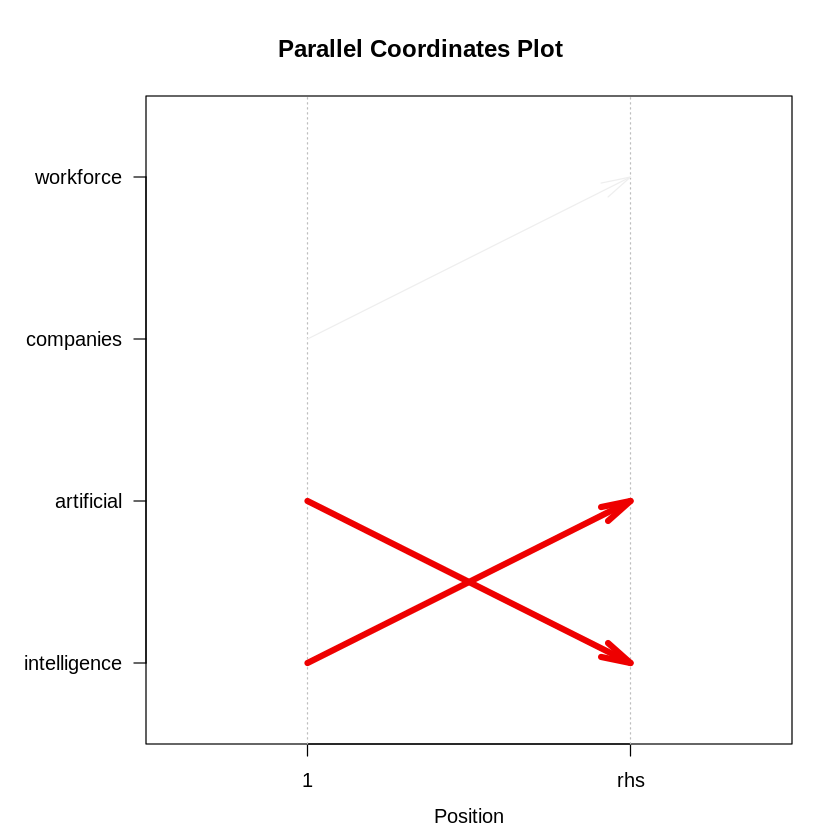

In [ ]:
# Install packages (if needed)
if (!require("pacman")) install.packages("pacman")
pacman::p_load(arules, arulesViz, tm, tidytext, dplyr, ggplot2, parallel)

# 1. Load and preprocess data
data <- read.csv("/content/arm_data.csv")

# Faster tokenization with filtering
tokens <- data %>%
  select(Processed_Description) %>%
  unnest_tokens(word, Processed_Description) %>%
  anti_join(stop_words) %>%
  filter(nchar(word) >= 3) %>%
  count(word) %>%
  filter(n >= 10) %>%  # Increased minimum frequency for speed
  pull(word)

# 2. Create transactions
trans_list <- lapply(data$Processed_Description, function(text) {
  words <- unlist(strsplit(tolower(text), "\\s+"))
  unique(words[words %in% tokens])
})
transactions <- as(trans_list, "transactions")

# 3. Mine rules with parallel processing
cl <- makeCluster(detectCores() - 1)
clusterEvalQ(cl, library(arules))

rules <- apriori(transactions,
  parameter = list(
    support = 0.02,    # Lowered threshold to get more rules
    confidence = 0.3,
    minlen = 2,
    maxlen = 3,
    target = "rules",
    maxtime = 30       # Max 30 seconds for mining
  ))

stopCluster(cl)

# 4. Handle results safely
if (length(rules) > 0) {
  # Remove redundant rules
  rules <- rules[!is.redundant(rules)]

  # Get top rules (handle cases with <15 rules)
  n_rules <- min(15, length(rules))
  top_rules <- head(sort(rules, by = "lift"), n_rules)

  # Save results
  write.csv(as(top_rules, "data.frame"), "ai_rules.csv", row.names = FALSE)

  # Visualize only if we have rules
  if (n_rules > 0) {
    plot(top_rules, method = "graph",
         engine = "igraph",
         main = paste("Top", n_rules, "AI-Workforce Associations"))

    plot(top_rules, method = "paracoord",
         main = "Parallel Coordinates Plot")
  } else {
    message("No significant rules found. Try lowering thresholds.")
  }
} else {
  message("No rules generated. Try lowering support/confidence thresholds.")
}

Joining with `by = join_by(word)`


[[1]]
[1] "arules"    "Matrix"    "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE      30    0.01      2
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[86 item(s), 200 transaction(s)] done [0.00s].
sorting and recoding items ... [85 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(transactions, parameter = list(support = 0.01, confidence = 0.2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.01s].
writing ... [628 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].

 === TOP 15 RULES BY SUPPORT === 
                             rules support confidence coverage      lift count
231 {intelligence} => {artificial}   0.095  0.9500000    0.100  8.636364    19
232 {artificial} => {intelligence}   0.095  0.8636364    0.110  8.636364    19
105         {trump} => {president}   0.020  0.8000000    0.025 26.666667     4
106         {president} => {trump}   0.020  0.6666667    0.030 26.666667     4
154           {market} => {global}   0.020  0.6666667    0.030  8.888889     4
155           {global} => {market}   0.020  0.2666667    0.075  8.888889     4
173    {summit} => {international}   0.020  0.6666667    0.030 22.222222     4
174    {international} => {summit}   0.020  0.6666667    0.030 22.222222     4
179           {summit} => {global}   0.020  0.6666667    0.030  8.888889     4
180           {global} => {summit}   0.020  0.2666667    0.075  8.888889     4
198

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



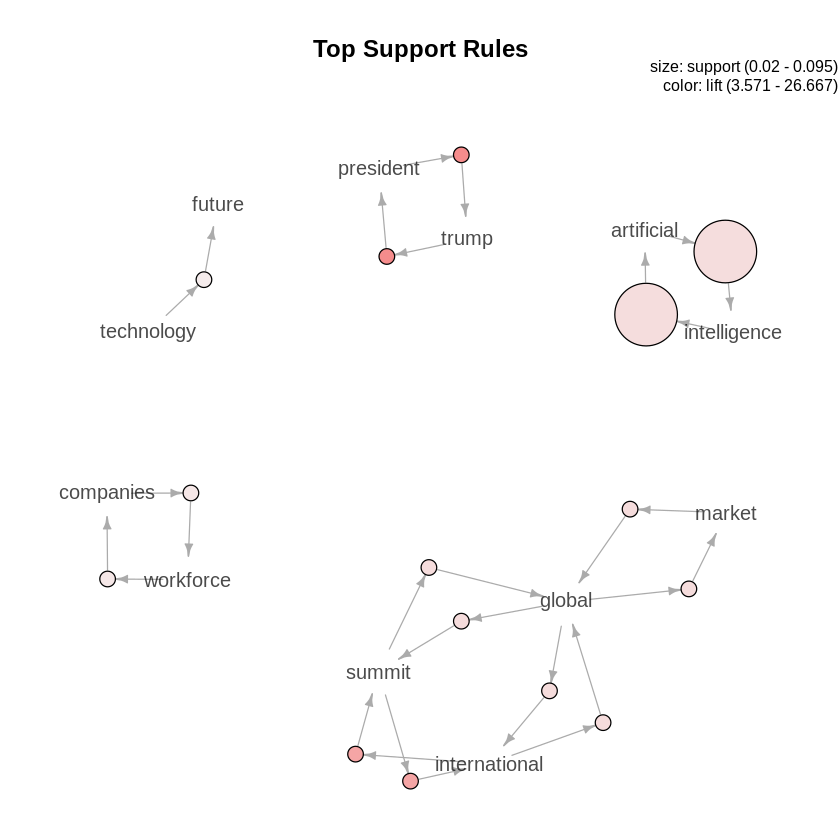

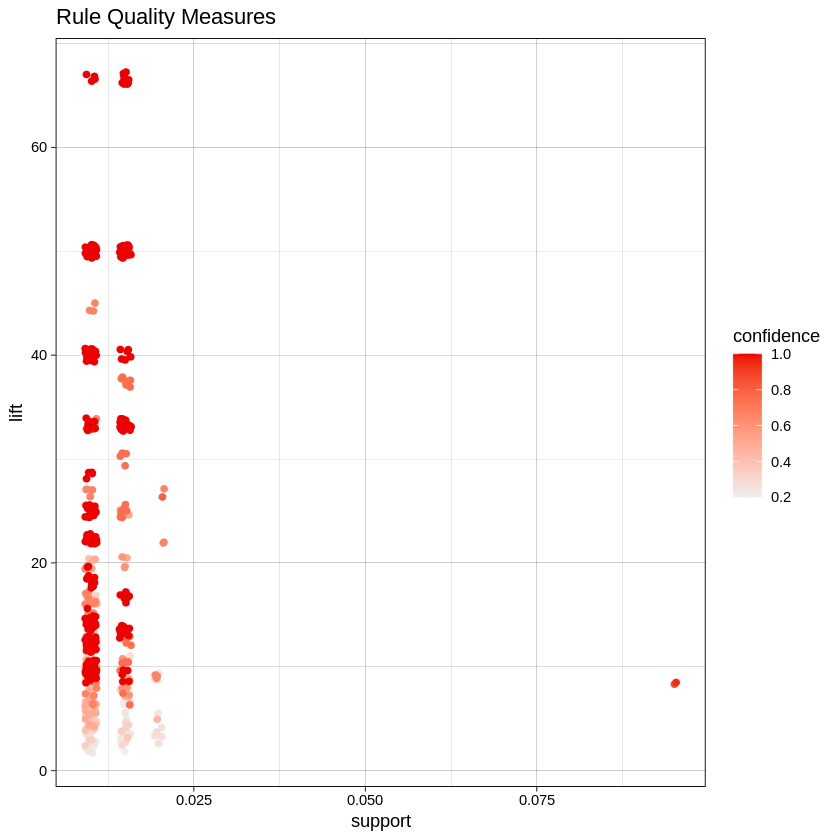

In [ ]:
# Install packages (if needed)
if (!require("pacman")) install.packages("pacman")
pacman::p_load(arules, arulesViz, tm, tidytext, dplyr, ggplot2, parallel)

# 1. Load and preprocess data
data <- read.csv("/content/arm_data.csv")

# Faster tokenization with filtering
tokens <- data %>%
  select(Processed_Description) %>%
  unnest_tokens(word, Processed_Description) %>%
  anti_join(stop_words) %>%
  filter(nchar(word) >= 3) %>%
  count(word) %>%
  filter(n >= 5) %>%  # Minimum 5 occurrences
  pull(word)

# 2. Create transactions
trans_list <- lapply(data$Processed_Description, function(text) {
  words <- unlist(strsplit(tolower(text), "\\s+"))
  unique(words[words %in% tokens])
})
transactions <- as(trans_list, "transactions")

# 3. Mine rules with parallel processing
cl <- makeCluster(detectCores() - 1)
clusterEvalQ(cl, library(arules))

rules <- apriori(transactions,
  parameter = list(
    support = 0.01,    # Lower threshold to get more rules
    confidence = 0.2,  # Lower confidence threshold
    minlen = 2,
    maxlen = 3,
    target = "rules",
    maxtime = 30
  ))

stopCluster(cl)

# 4. Process and display results
if (length(rules) > 0) {
  rules <- rules[!is.redundant(rules)]

  # Function to safely get top N rules
  get_top_rules <- function(rules, measure, n = 15) {
    if (length(rules) == 0) return(NULL)
    n <- min(n, length(rules))
    head(sort(rules, by = measure), n)
  }

  # Get top rules for each measure
  top_support <- get_top_rules(rules, "support")
  top_confidence <- get_top_rules(rules, "confidence")
  top_lift <- get_top_rules(rules, "lift")

  # Convert to data frames for better printing
  print_results <- function(rules, title) {
    cat("\n", title, "\n")
    if (is.null(rules)) {
      cat("No rules meet the criteria\n")
    } else {
      print(as(rules, "data.frame"))
    }
  }

  print_results(top_support, "=== TOP 15 RULES BY SUPPORT ===")
  print_results(top_confidence, "=== TOP 15 RULES BY CONFIDENCE ===")
  print_results(top_lift, "=== TOP 15 RULES BY LIFT ===")

  # Save all rules
  write.csv(as(rules, "data.frame"), "all_ai_rules.csv", row.names = FALSE)

  # Visualizations (if we have enough rules)
  if (length(rules) >= 5) {
    # Network graph for high-support rules
    plot(top_support, method = "graph",
         engine = "igraph",
         main = "Top Support Rules")

    # Scatter plot showing support vs. lift
    plot(rules, measure = c("support", "lift"),
         shading = "confidence",
         main = "Rule Quality Measures")
  }

} else {
  message("No rules generated. Try lowering support/confidence thresholds.")
}